In [3]:
# Import necessary libraries
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Set up paths to dataset
base_dir = '/content/drive/MyDrive/Colab Notebooks/cats_vs_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [6]:
# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)


Found 2015 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=1e-4), metrics=['accuracy'])



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Train the model from scratch
history = model.fit(
    train_generator,
    steps_per_epoch=50,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=25
)

Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.7224 - loss: 0.5522 - val_accuracy: 0.7360 - val_loss: 0.5292
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.7089 - loss: 0.5589 - val_accuracy: 0.7400 - val_loss: 0.5032
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 156ms/step - accuracy: 0.8000 - loss: 0.4796 - val_accuracy: 0.7440 - val_loss: 0.4953
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.7214 - loss: 0.5452 - val_accuracy: 0.7180 - val_loss: 0.5529
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.7170 - loss: 0.5384 - val_accuracy: 0.7480 - val_loss: 0.5070
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 170ms/step - accuracy: 0.7000 - loss: 0.6035 - val_accuracy: 0.7500 - val_loss: 0.5069
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.6979 - loss: 0.5412 - val_accuracy: 0.7580 - val_loss: 0.5015
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.7219 - loss: 0.5295 - val_accuracy: 0.7060 - val_

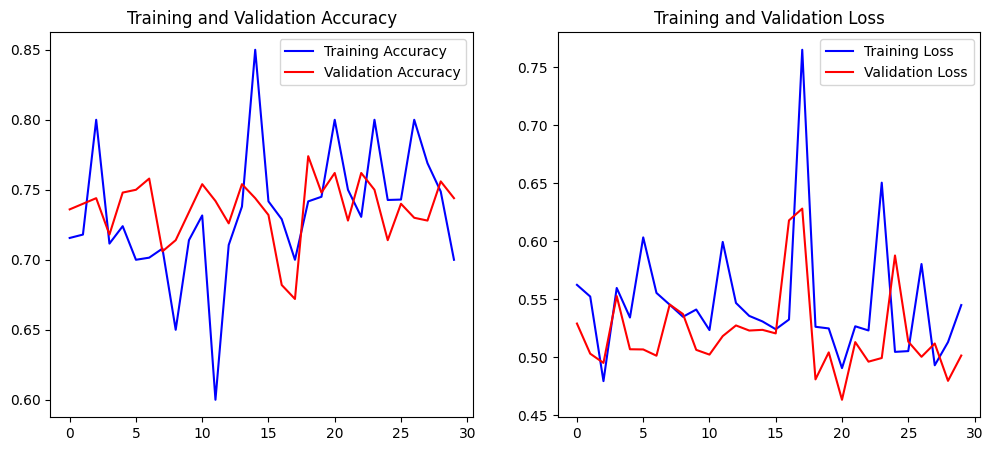

In [14]:
def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

plot_training(history)

In [15]:
# Save the model
model.save("convnet_from_scratch.keras")
print("Model saved as 'convnet_from_scratch.keras'")

# Load the saved model
test_model = keras.models.load_model("convnet_from_scratch.keras")

# Evaluate the model on the test set
test_loss, test_acc = test_model.evaluate(test_generator, steps=25)
print(f"Test accuracy: {test_acc:.3f}")


Model saved as 'convnet_from_scratch.keras'
25/25 ━━━━━━━━━━━━━━━━━━━━ 246s 10s/step - accuracy: 0.7448 - loss: 0.5438
Test accuracy: 0.744


Q2. Increase your training sample size. You may pick any amount. Keep the validation and test samples the same as above. Optimize your network (again training from scratch). What performance did you achieve?

By means of data augmentation

In [16]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [17]:
history_large = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=25
)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - accuracy: 0.7460 - loss: 0.5182 - val_accuracy: 0.7240 - val_loss: 0.5117
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - accuracy: 0.9000 - loss: 0.4248 - val_accuracy: 0.7360 - val_loss: 0.5071
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - accuracy: 0.7451 - loss: 0.5068 - val_accuracy: 0.7440 - val_loss: 0.4988
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step - accuracy: 0.7500 - loss: 0.5362 - val_accuracy: 0.7500 - val_loss: 0.4953
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.7527 - loss: 0.5047 - val_accuracy: 0.7180 - val_loss: 0.5238
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 112ms/step - accuracy: 0.7000 - loss: 0.5518 - val_accuracy: 0.7120 - val_loss: 0.5239
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.7370 - loss: 0.5016 - val_accuracy: 0.7560 - val_loss: 0.4610
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.6500 - loss: 0.5915 - val_

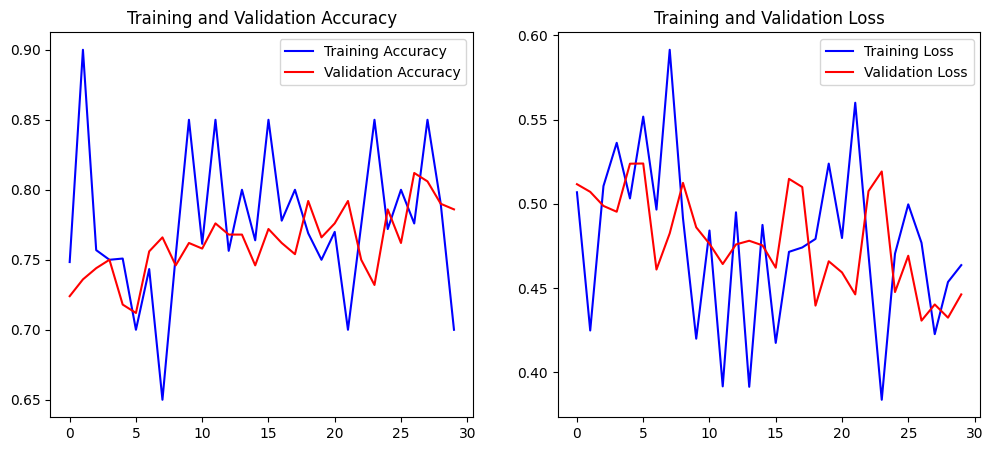

In [20]:
plot_training(history_large)

Q3. Now change your training sample so that you achieve better performance than those from Steps 1 and 2. This sample size may be larger, or smaller than those in the previous steps. The objective is to find the ideal training sample size to get best prediction results.

Identifying the best sample size for optimal accuracy.

Experiment with Different Sizes

In [22]:
sample_sizes = [1000, 2000, 4000, 6000]
results = []

for size in sample_sizes:
    print(f"\nTraining with sample size: {size}")
    history = model.fit(
        train_generator,
        steps_per_epoch=size // 20,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=25
    )
    val_acc = max(history.history['val_accuracy'])
    results.append((size, val_acc))


Training with sample size: 1000
Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.9137 - loss: 0.2351 - val_accuracy: 0.8000 - val_loss: 0.5841
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.8902 - loss: 0.2346 - val_accuracy: 0.8300 - val_loss: 0.4572
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 364ms/step - accuracy: 0.7500 - loss: 0.4279 - val_accuracy: 0.8360 - val_loss: 0.3997
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.8838 - loss: 0.2750 - val_accuracy: 0.8340 - val_loss: 0.4296
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.9070 - loss: 0.2359 - val_accuracy: 0.8160 - val_loss: 0.4301
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 169ms/step - accuracy: 0.7500 - loss: 0.5040 - val_accuracy: 0.8260 - val_loss: 0.3769
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.8900 - loss: 0.2505 - val_accuracy: 0.8180 - val_loss: 0.4348
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.9052 - loss: 0.

In [30]:
print("Results:", results)


Results: [(1000, 0.8579999804496765), (2000, 0.8560000061988831), (4000, 0.871999979019165), (6000, 0.871999979019165)]


In [23]:
sample_sizes = [x[0] for x in results]
validation_accuracies = [x[1] for x in results]


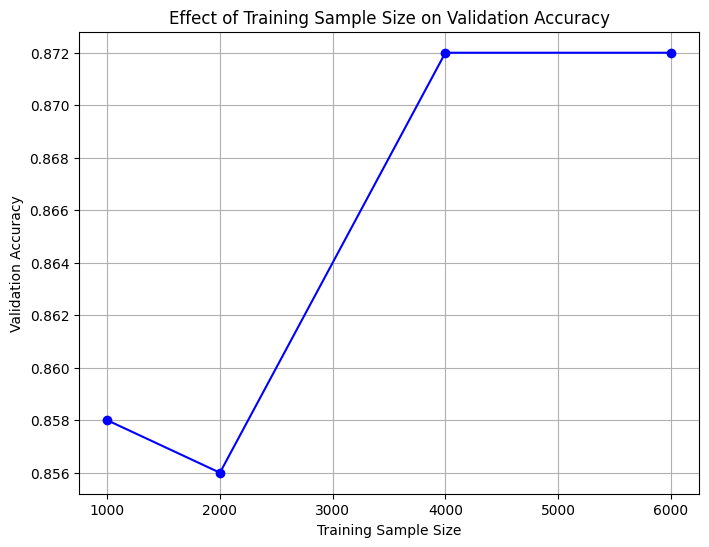

In [24]:
import matplotlib.pyplot as plt

def plot_results(sample_sizes, validation_accuracies):
    plt.figure(figsize=(8, 6))
    plt.plot(sample_sizes, validation_accuracies, marker='o', linestyle='-', color='blue')
    plt.xlabel('Training Sample Size')
    plt.ylabel('Validation Accuracy')
    plt.title('Effect of Training Sample Size on Validation Accuracy')
    plt.grid(True)
    plt.show()

# Plot the results
plot_results(sample_sizes, validation_accuracies)


Question 4: Using a Pretrained Network

Implement Transfer Learning using VGG16 for feature extraction.

Load Pretrained VGG16 Model

In [25]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
conv_base.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model = models.Sequential([
    conv_base,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=1e-4), metrics=['accuracy'])


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 469s 23s/step - accuracy: 0.4934 - loss: 0.7954 - val_accuracy: 0.5080 - val_loss: 0.6996
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 503s 26s/step - accuracy: 0.5277 - loss: 0.6900 - val_accuracy: 0.6280 - val_loss: 0.6868
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 454s 23s/step - accuracy: 0.5911 - loss: 0.6828 - val_accuracy: 0.5960 - val_loss: 0.6716
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 453s 23s/step - accuracy: 0.4849 - loss: 0.7266 - val_accuracy: 0.5900 - val_loss: 0.6811
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 454s 23s/step - accuracy: 0.5539 - loss: 0.6749 - val_accuracy: 0.4720 - val_loss: 0.7305
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 134s 6s/step - accuracy: 0.3500 - loss: 0.7572 - val_accuracy: 0.4960 - val_loss: 0.7080
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 468s 24s/step - accuracy: 0.4875 - loss: 0.7016 - val_accuracy: 0.5020 - val_loss: 0.6931
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 484s 24s/step - accuracy: 0.4721 - loss: 0.6932 - val_accuracy: 0.5

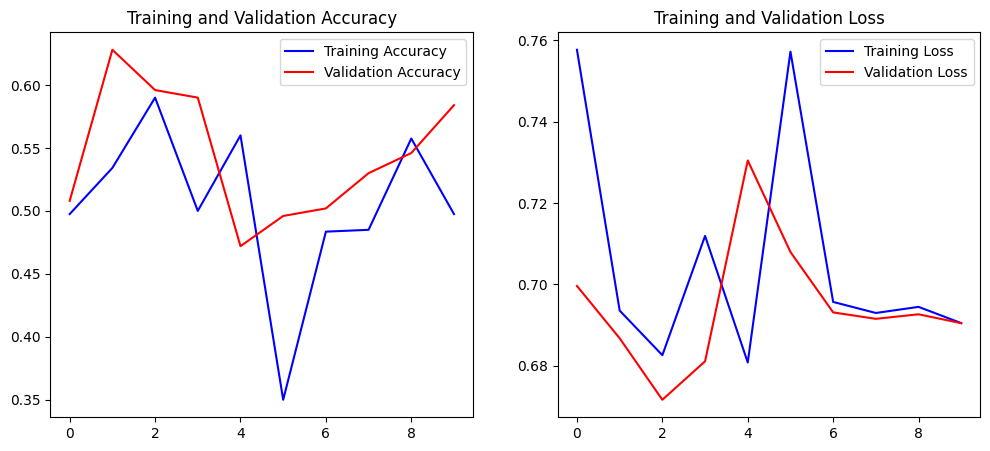

In [27]:
history_pretrained = model.fit(
    train_generator,
    steps_per_epoch=20,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=25
)

plot_training(history_pretrained)

In [28]:
import pandas as pd

comparison_data = pd.DataFrame({
    "Model": ["From Scratch", "Larger Data", "Pretrained VGG16"],
    "Validation Accuracy": [
        max(history.history['val_accuracy']),
        max(history_large.history['val_accuracy']),
        max(history_pretrained.history['val_accuracy'])
    ]
})

print(comparison_data)


              Model  Validation Accuracy
0      From Scratch                0.872
1       Larger Data                0.812
2  Pretrained VGG16                0.628


/tmp/ipython-input-2929850655.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Validation Accuracy', data=comparison_data, palette='viridis')


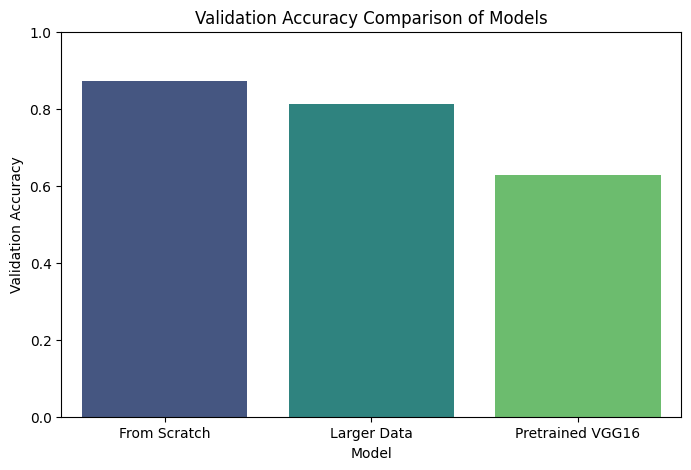

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the DataFrame
comparison_data = pd.DataFrame({
    "Model": ["From Scratch", "Larger Data", "Pretrained VGG16"],
    "Validation Accuracy": [
        max(history.history['val_accuracy']),
        max(history_large.history['val_accuracy']),
        max(history_pretrained.history['val_accuracy'])
    ]
})

# Plot the bar graph
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Validation Accuracy', data=comparison_data, palette='viridis')

# Add labels and title
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.title('Validation Accuracy Comparison of Models')
plt.xlabel('Model')
plt.ylabel('Validation Accuracy')

# Show the plot
plt.show()
